# Gray Wolf Optimization

**Aim:** To implement graywolf optimization algorithm

## Gray Wolf Optimization Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# wolf class
class Wolf:
    def __init__(self, fitness, dim, minx, maxx, seed):
        np.random.seed(seed)
        self.pos = np.random.uniform(minx,maxx,dim)
        self.fitness = fitness(self.pos) # curr fitness

In [3]:
# grey wolf optimization (GWO)
def gwo(fitness, max_iter, n, dim, minx, maxx):

	# create n random wolves
	population = [ Wolf(fitness, dim, minx, maxx, i) for i in range(n)]

	# On the basis of fitness values of wolves, sort the population in asc order
	population = sorted(population, key = lambda temp: temp.fitness)

	# best 3 solutions will be called as alpha, beta and gaama
	alpha_wolf, beta_wolf, gamma_wolf = np.copy(population[: 3])

	best_pos_track = []

	# main loop of gwo
	for iter in range(max_iter):

		# after every 10 iterations print iteration number and best fitness value so far
		if iter % 5 == 0 :
			print(f"{iter}> best fitness = {alpha_wolf.fitness:.4e} Best position = {alpha_wolf.pos}")

		# linearly decreased from 2 to 0
		a = 2*(1 - iter/max_iter)

		# updating each population member with the help of best three members
		for wolf in population:
			A1, A2, A3 = a * (2 * np.random.rand(3) - 1)
			C1, C2, C3 = 2 * np.random.rand(3)

			X1 = alpha_wolf.pos - A1 * np.abs(C1 * alpha_wolf.pos - wolf.pos)
			X2 = beta_wolf.pos - A2 * np.abs(C2 * beta_wolf.pos - wolf.pos)
			X3 = gamma_wolf.pos - A3 * np.abs(C3 * gamma_wolf.pos - wolf.pos)
			X_new = (X1 + X2 + X3)/3
			
			# fitness calculation of new solution
			f_new = fitness(X_new)

			# greedy selection
			if f_new < wolf.fitness:
				wolf.pos = X_new
				wolf.fitness = f_new
				
		population = sorted(population, key = lambda x: x.fitness)

		alpha_wolf, beta_wolf, gamma_wolf = np.copy(population[: 3])

		best_pos_track.append(alpha_wolf.pos)

	print("Best solution found:")
	print(alpha_wolf.pos)
	print(f"fitness of best solution = {alpha_wolf.fitness:.4e}")

	# returning the best solution
	return alpha_wolf.pos,best_pos_track

## Functions for plotting

In [4]:
def plot_optimization(fitness,minx,maxx,best_pos_track):
    x = np.linspace(minx,maxx,300)
    X1,X2 = np.meshgrid(x,x)
    X = np.dstack([X1,X2])
    Y = np.apply_along_axis(fitness,-1,X)
    plt.figure(figsize=(10,10))
    plt.contourf(X1,X2,Y,levels=25,cmap="Blues")
    x,y = np.array(best_pos_track).T
    plt.plot(x,y,"r")
    plt.plot(*best_pos_track[0],"o",label="start")
    plt.plot(*best_pos_track[-1],"X",label="end")
    plt.legend()
    plt.show()

## Hyperparameter setup

In [5]:
np.set_printoptions(precision=6,suppress=True)        

dim = 2
num_particles = 50
max_iter = 50
minx, maxx = -10.0, 10.0

## GWO for Rastrigin Function

In [6]:
def rastrigin(x):
    x = np.array(x)
    return 10*x.shape[0] + np.sum(x**2 - 10 * np.cos(2*np.pi*x))

best_position,best_pos_track = gwo(rastrigin, max_iter, num_particles, dim,minx ,maxx)

0> best fitness = 1.1326e+01 Best position = [3.007485 0.109067]
5> best fitness = 1.3496e+00 Best position = [-0.983412 -0.040783]
10> best fitness = 1.3256e-01 Best position = [-0.021159  0.014876]
15> best fitness = 9.8946e-03 Best position = [-0.002841  0.006466]
20> best fitness = 1.4473e-04 Best position = [-0.00062   0.000588]
25> best fitness = 5.7786e-06 Best position = [0.000107 0.000133]
30> best fitness = 1.2597e-07 Best position = [-0.000016  0.000019]
35> best fitness = 2.5532e-08 Best position = [-0.000007  0.000009]
40> best fitness = 7.4806e-09 Best position = [-0.000004  0.000004]
45> best fitness = 5.7341e-09 Best position = [-0.000004  0.000004]
Best solution found:
[-0.000004  0.000004]
fitness of best solution = 5.4770e-09


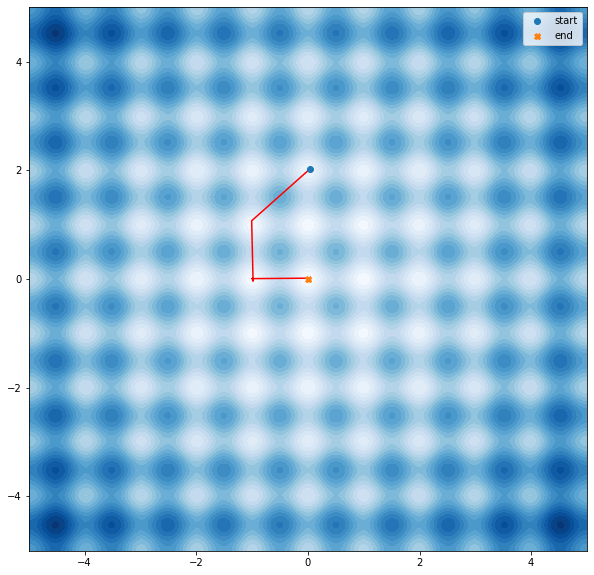

In [7]:
plot_optimization(rastrigin,-5,5,best_pos_track)

## GWO for Sphere Function

In [8]:
def sphere(x):
    x = np.array(x)
    return np.sum(x**2)

best_position, best_pos_track = gwo(sphere, max_iter, num_particles, dim, -10.0, 10.0)

0> best fitness = 9.0569e+00 Best position = [3.007485 0.109067]
5> best fitness = 2.9501e-03 Best position = [ 0.042076 -0.034348]
10> best fitness = 7.3396e-06 Best position = [-0.0007   -0.002617]
15> best fitness = 5.0712e-09 Best position = [ 0.00006  -0.000039]
20> best fitness = 1.1900e-10 Best position = [ 0.000007 -0.000009]
25> best fitness = 3.9156e-12 Best position = [ 0.000002 -0.000001]
30> best fitness = 4.9359e-13 Best position = [ 0.000001 -0.      ]
35> best fitness = 1.4969e-13 Best position = [ 0. -0.]
40> best fitness = 8.5065e-14 Best position = [ 0. -0.]
45> best fitness = 6.2257e-14 Best position = [ 0. -0.]
Best solution found:
[ 0. -0.]
fitness of best solution = 5.9172e-14


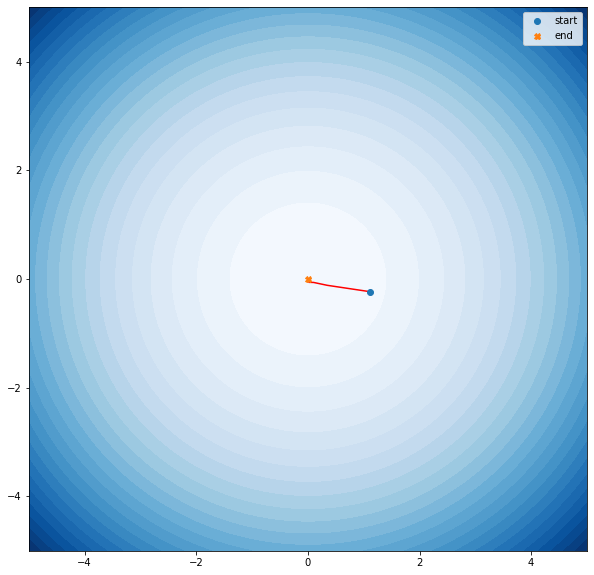

In [9]:
plot_optimization(sphere,-5,5,best_pos_track)